# 확률변수의 독립과 상관

두 확률변수가 있을 때, 한 확률변수의 **표본 값이 달라지면 다른 확률변수의 조건부 분포가 달라질 때 서로 상관 관계**가 있다고 한다. 반대로 두 확률변수가 상관 관계가 아니면 서로 **독립(independent)**이라고 한다. 확률변수의 독립을 수학적으로 정의하면 다음과 같다.

두 확률변수 $X$, $Y$의 결합 확률밀도함수(joint pdf)가 주변 확률밀도함수(marginal pdf)의 곱과 같으면 서로 독립(independent)이다.

$$ f_{XY}(x, y) = f_X(x)f_Y(y) $$

이 정의는 확률변수가 두 개 보다 많을 때도 적용된다. 예를 들어 세 개의 확률변수 $X$, $Y$, $Z$의 결합 확률밀도함수가 각각의 주변 확률밀도함수(marginal pdf)의 곱과 같으면 세 확률변수는 서로 독립이다.

$$ f_{XYZ}(x, y, z) = f_X(x)f_Y(y)f_Z(z) $$

이 때 $X$, $Y$, $Z$ 중 어느 두 확률변수를 골라도 서로 독립이 된다.

$$ 
\begin{eqnarray}
f_{XY}(x, y) 
&=& \sum_{z\in\Omega_z} f_{XY}(x, y, z) \\
&=& \sum_{z\in\Omega_z}  f_X(x)f_Y(y)f_Z(z) \\
&=& f_X(x)f_Y(y) \sum_{z\in\Omega_z}  f_Z(z) \\
&=&  f_X(x)f_Y(y) 
\end{eqnarray}
$$

## 반복시행


**같은 확률변수에서 복수의 표본 데이터를 취하는 경우에는 이 표본들은 서로 독립인 확률변수들에서 나온 표본**으로 볼 수 있다.
따라서 확률밀도함수가 $f(x)$이고 표본 데이터가 $\{x_1, x_2, x_3, \cdots, x_N \}$이면 이 데이터, 즉 벡터 $(x_1, x_2, x_3, \cdots, x_N)$가 나올 확률은 다음과 같다.

$$ f(x_1, x_2, x_3, \cdots, x_N ) = \prod_{i=1}^N f(x_i) $$  


## 조건부 확률분포

독립인 두 확률변수 $X, Y$의 조건부 확률밀도함수는 주변 확률밀도함수와 같다.

$$ f_{X \mid Y} (x | y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{Y}(y)} = f_{X}(x) $$

$$ f_{Y \mid X} (y | x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{X}(x)} = f_{Y}(y) $$

확률변수 $X$가 다른 확률변수 $Y$에 독립이면 조건부 확률 분포가 조건이 되는 확률변수의 값에 영향을 받지 않는다. 즉, $Y$ 값이 $y_1$일 때와 $y_2$일 때의 조건부 확률 분포 $f(x \mid y_1)$과 $f(x \mid y_2)$이 $f(x)$로 같다는 의미이다. 

예를 들어 다음과 같은 두 이산 확률변수의 결합 확률 분포를 보자.

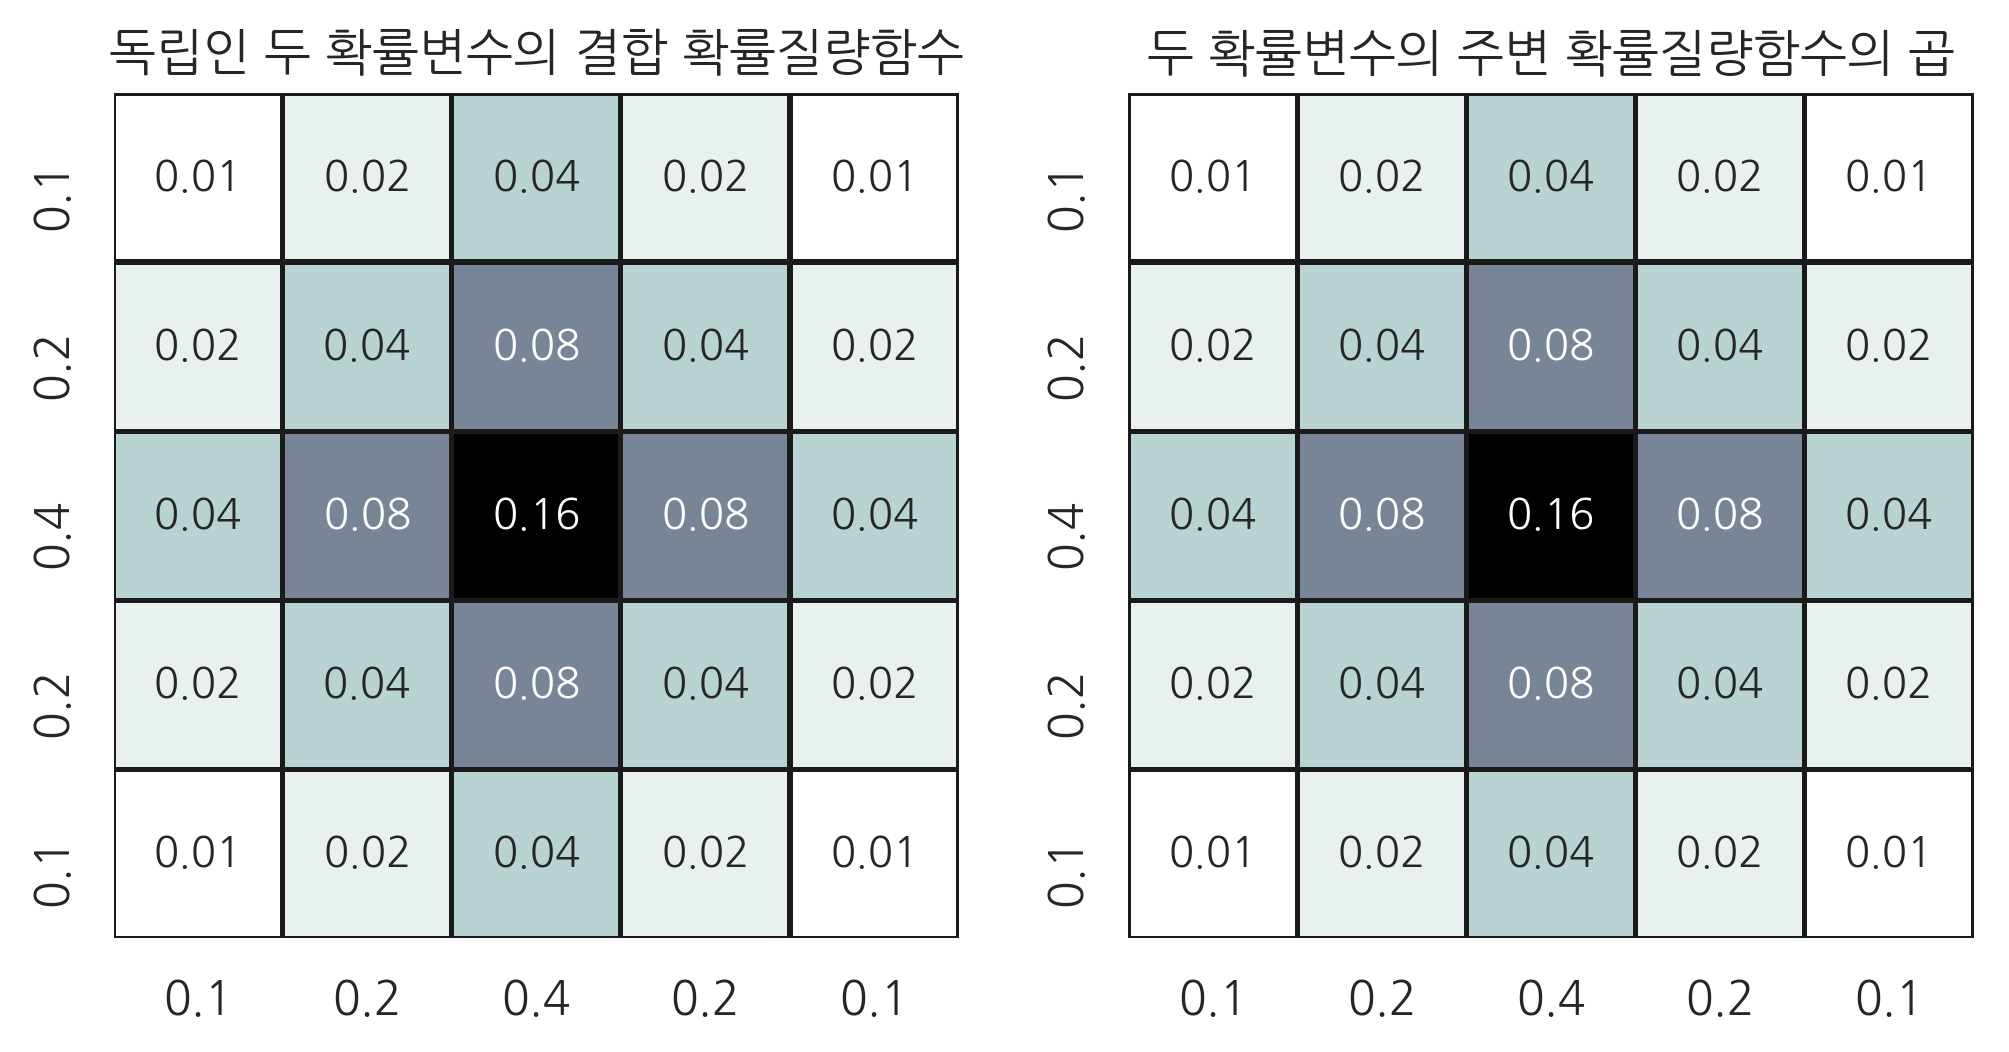

In [1]:
pmf1 = np.array([[1, 2,  4, 2, 1],
                 [2, 4,  8, 4, 2],
                 [4, 8, 16, 8, 4],
                 [2, 4,  8, 4, 2],
                 [1, 2,  4, 2, 1]])
pmf1 = pmf1/pmf1.sum()

pmf1_marginal_x = np.round(pmf1.sum(axis=0), 2)
pmf1_marginal_y = np.round(pmf1.sum(axis=1), 2)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]

plt.subplot(121)
sns.heatmap(pmf1, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("독립인 두 확률변수의 결합 확률질량함수")

plt.subplot(122)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
sns.heatmap(pmf1x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title("두 확률변수의 주변 확률질량함수의 곱")

plt.show()

여러 가지 Y값을 바꾸어도 조건부 확률은 변하지 않는 것을 확인할 수 있다.


In [2]:
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
cond_x_y0

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [3]:
cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
cond_x_y1

array([0.1, 0.2, 0.4, 0.2, 0.1])

이번에는 다음과 같은 상관관계가 있는 두 확륣변수를 보자. 

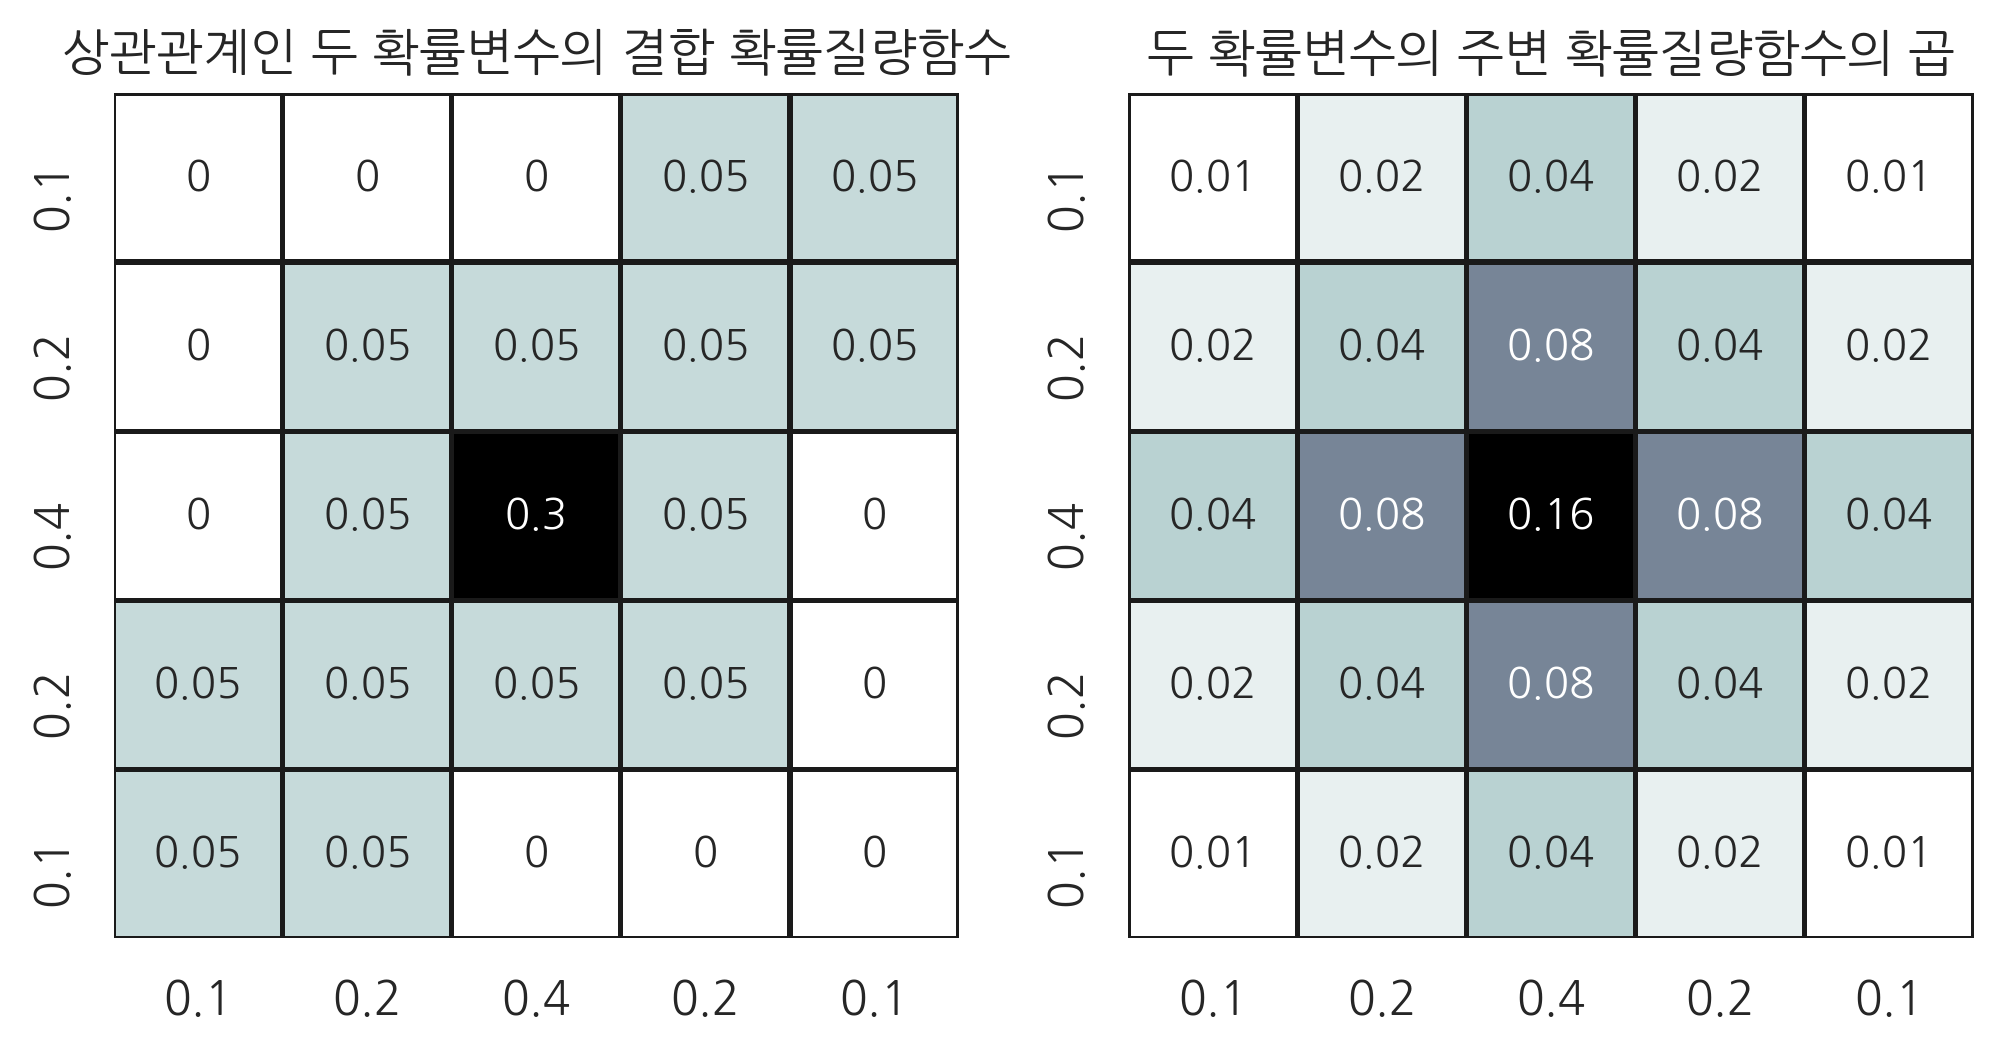

In [4]:
pmf2 = np.array([[0, 0,  0, 5, 5],
                 [0, 5,  5, 5, 5],
                 [0, 5, 30, 5, 0],
                 [5, 5,  5, 5, 0],
                 [5, 5,  0, 0, 0]])
pmf2 = pmf2/pmf2.sum()

pmf2_marginal_x = np.round(pmf2.sum(axis=0), 2)
pmf2_marginal_y = np.round(pmf2.sum(axis=1), 2)

plt.subplot(121)
sns.heatmap(pmf2, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("상관관계인 두 확률변수의 결합 확률질량함수")

plt.subplot(122)
pmf2x = pmf2_marginal_x * pmf2_marginal_y[:, np.newaxis]
sns.heatmap(pmf2x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor="k",
            cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title("두 확률변수의 주변 확률질량함수의 곱")

plt.show()

주변 확률분포는 앞의 예와 같지만 $Y$의 표본 값에 따라 $X$의 조건부 확률분포가 달라지는 것을 확인할 수 있다.

In [5]:
cond_x_y0 = pmf2[0, :]/pmf2_marginal_y[0]
cond_x_y0

array([0. , 0. , 0. , 0.5, 0.5])

In [6]:
cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
cond_x_y1

array([0.  , 0.25, 0.25, 0.25, 0.25])

#### 연습 문제 1

1. 독립인 두 이산 확률변수의 결합 확률 질량 함수의 예를 들어라.
2. 독립인 두 연속 확률변수의 결합 확률밀도함수의 예를 들어라.

## 독립 확률변수의 기댓값

독립인 두 확률변수 $X, Y$의 기댓값은 다음 성질을 만족한다. 

$$ \text{E}[XY] = \text{E}[X]\text{E}[Y] $$

$$ \text{E}[(X - \mu_X)(Y-\mu_Y)] = 0 $$

(증명)

$$ 
\begin{eqnarray}
\text{E}[XY] 
&=& \iint xy \;f_{XY}(x, y) \; dx dy  \\
&=& \iint  xy \;f_{X}(x)f_{Y}(y) \; dx dy \\
\end{eqnarray}
$$

다중 적분의 값은 적분을 연속하여 한 값과 같다는 Fubini의 정리에 의해 다음처럼 증명할 수 있다.

$$ 
\begin{eqnarray}
\text{E}[XY] 
&=& \int \left( \int xy \;f_{X}(x)f_{Y}(y) dx \right) dy \\
&=& \int \left( y\; f_{Y}(y) \left( \int x\; f_{X}(x) \; dx \right) \right) dy \\
&=& \left( \int x\;f_{X}(x) \; dx \right) \left( \int y\;f_{Y}(y) \; dy \right) \\
&=& \text{E}[X] \text{E}[Y] \\
\end{eqnarray}
$$

이 결과를 이용하여 두번째 등식도 다음처럼 증명한다.

$$ 
\begin{eqnarray}
\text{E}[(X - \mu_X)(Y-\mu_Y)] 
&=& \text{E}\left[XY - \mu_XY-\mu_YX + \mu_X\mu_Y\right] \\
&=& \text{E}[XY] - \mu_X\text{E}[Y]-\mu_Y\text{E}[X] + \mu_X\mu_Y  \\
&=& \text{E}[XY] - \mu_X\mu_Y  \\
&=& \text{E}[XY] - \text{E}[X]\text{E}[Y] = 0 
\end{eqnarray}
$$

## 독립 확률변수의 분산

독립인 두 확률변수 $X, Y$의 분산은 다음 성질을 만족한다. 증명은 생략한다.

$$ \text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y] $$